In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import bisplrep, bisplev
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

c:\Users\amish\anaconda3\Lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [66]:
df = pd.read_parquet("C:\\Users\\amish\\OneDrive\\Desktop\\NK_Securities_Research\\train_data.parquet")

In [67]:
df.columns

Index(['timestamp', 'underlying', 'expiry', 'call_iv_23500', 'call_iv_23600',
       'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000',
       'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400',
       'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800',
       'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200',
       'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600',
       'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000',
       'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800',
       'put_iv_22900', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200',
       'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600',
       'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000',
       'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400',
       'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800',
       'put_iv_24900', 'put_iv_25000', 'X0', '

In [70]:
feature_cols = [f'X{i}' for i in range(42)]
iv_cols = [col for col in df.columns if 'call_iv' in col or 'put_iv' in col]

# Create a mapping for expiry to numerical (since it's categorical)
df['expiry_num'] = pd.factorize(df['expiry'])[0]
df = df[df['expiry_num']==1]

In [ ]:

for i in iv_cols:
    df = df[(df[i]>0)&(df[i]<3)] 

In [19]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
feature_cols = [f'X{i}' for i in range(42)]
iv_cols = [col for col in df.columns if 'call_iv' in col or 'put_iv' in col]

df['X2'] = df['X2'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X4'] = df['X4'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X8'] = df['X8'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X10'] = df['X10'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X12'] = df['X12'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X14'] = df['X14'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X16'] = df['X16'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X17'] = df['X17'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X19'] = df['X19'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X20'] = df['X20'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X21'] = df['X21'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X23'] = df['X23'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X24'] = df['X24'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X27'] = df['X27'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X30'] = df['X30'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X31'] = df['X31'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X34'] = df['X34'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X38'] = df['X38'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X39'] = df['X39'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X40'] = df['X40'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df['X41'] = df['X41'].apply(lambda x: 0 if x == 0 else np.sign(x) * np.log1p(abs(x)))
df = df[(df['X7']<1) & (df['X7']>-1)]

In [73]:
# List of call and put IV columns
call_iv_columns = [col for col in df.columns if 'call_iv' in col]
put_iv_columns  = [col for col in df.columns if 'put_iv' in col]

# Extract corresponding strikes
call_strikes = [int(col.split('_')[-1]) for col in call_iv_columns]
put_strikes  = [int(col.split('_')[-1]) for col in put_iv_columns]

# Common strikes (if needed, but generally should align)
common_strikes = sorted(set(call_strikes).intersection(put_strikes))

# Function to find ATM call and put IV at each row
def get_atm_ivs(row):
    underlying_price = row['underlying']
    atm_strike = min(common_strikes, key=lambda x: abs(x - underlying_price))
    call_iv = row[f'call_iv_{atm_strike}']
    put_iv  = row[f'put_iv_{atm_strike}']
    return pd.Series([atm_strike, call_iv, put_iv])

# Apply to entire DataFrame
df[['atm_strike', 'atm_call_iv', 'atm_put_iv']] = df.apply(get_atm_ivs, axis=1)


In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [75]:
# Features (market indicators)
feature_columns = [f'X{i}' for i in range(42)]
X = df[feature_columns+['underlying']]

# Targets
y_call = df['atm_call_iv']
y_put  = df['atm_put_iv']

In [76]:
X_train, X_test, y_call_train, y_call_test = train_test_split(X, y_call, test_size=0.2, random_state=42)
_, _, y_put_train, y_put_test = train_test_split(X, y_put, test_size=0.2, random_state=42)


In [78]:
# Call IV Random Forest
rf_call = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
rf_call.fit(X_train, y_call_train)

# Put IV Random Forest
rf_put = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
rf_put.fit(X_train, y_put_train)


RandomForestRegressor(max_depth=12, random_state=42)

In [79]:
# Predictions
call_iv_preds = rf_call.predict(X_test)
put_iv_preds  = rf_put.predict(X_test)

import joblib
joblib.dump(rf_call,'ATM_call.joblib')
joblib.dump(rf_put,'ATM_put.joblib')



['ATM_put.joblib']

In [80]:
# Call IV performance
call_mse = mean_squared_error(y_call_test, call_iv_preds)
call_r2  = r2_score(y_call_test, call_iv_preds)

# Put IV performance
put_mse = mean_squared_error(y_put_test, put_iv_preds)
put_r2  = r2_score(y_put_test, put_iv_preds)

print(f'ATM Call IV - MSE: {call_mse:.4f}, R2: {call_r2:.4f}')
print(f'ATM Put IV  - MSE: {put_mse:.4f}, R2: {put_r2:.4f}')


ATM Call IV - MSE: 0.0001, R2: 0.6922
ATM Put IV  - MSE: 0.0001, R2: 0.6975


IndexError: list index out of range

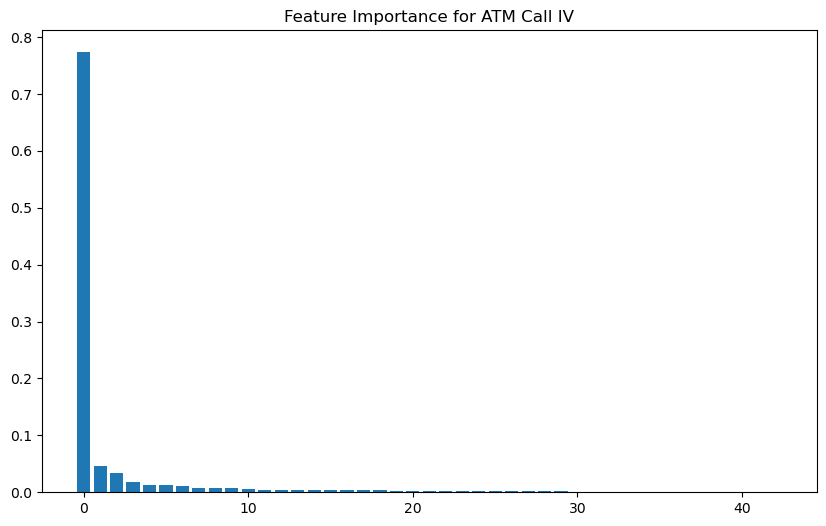

In [81]:
import matplotlib.pyplot as plt

# Call IV feature importance
importances = rf_call.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for ATM Call IV")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_columns[i] for i in indices], rotation=90)
plt.show()


In [82]:
strike_levels = sorted(set([int(col.split('_')[-1]) for col in call_iv_columns]))

for strike in strike_levels:
    df[f'moneyness_{strike}'] = (strike - df['underlying']) / df['underlying']

df['pred_call_iv_atm'] = rf_call.predict(X)
df['pred_put_iv_atm'] = rf_put.predict(X)

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare training dataset
train_data = []

for index, row in df.iterrows():
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    for offset in range(-5000, 5000, 100):
        strike = atm + offset
        if strike in strike_levels and offset != 0:
            moneyness = (strike - underlying) / underlying

            # Previous IV (here taking ATM IV for ±100 strikes as a proxy for simplicity)
            if abs(offset) == 100:
                prev_iv = row['pred_call_iv_atm']
            else:
                prev_iv = None  # Or interpolate / fill later

            current_iv = row.get(f'call_iv_{strike}', None)  # Assuming you have these IV columns

            if current_iv is not None:
                train_data.append({
                    'underlying': underlying,
                    'moneyness': moneyness,
                    'prev_iv': prev_iv,
                    'iv': current_iv
                })

train_df = pd.DataFrame(train_data)

# Drop missing prev_iv or fill using interpolation if needed
train_df = train_df.dropna()

# Train-Test split
X = train_df[['underlying', 'moneyness', 'prev_iv']]
y = train_df['iv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest Model
rf_neighbour_call = RandomForestRegressor(n_estimators=150, max_depth=8, random_state=42)
rf_neighbour_call.fit(X_train, y_train)


KeyboardInterrupt: 

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare Call training dataset
train_data_call = []

for index, row in df.iterrows():
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    for offset in range(-5000, 5000, 100):
        strike = atm + offset
        if strike in strike_levels and offset != 0:
            moneyness = (strike - underlying) / underlying

            # Previous IV (taking ATM IV for ±100 strikes as proxy for simplicity)
            if abs(offset) == 100:
                prev_iv = row['pred_call_iv_atm']
            else:
                prev_iv = None

            current_iv = row.get(f'call_iv_{strike}', None)

            if current_iv is not None and prev_iv is not None:
                train_data_call.append({
                        'underlying': underlying,
                        'moneyness': moneyness,
                        'prev_iv': prev_iv,
                        'iv': current_iv
                    })

# Convert to DataFrame
train_df_call = pd.DataFrame(train_data_call)

# Prepare Put training dataset
train_data_put = []

for index, row in df.iterrows():
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    for offset in range(-5000, 5000, 100):
        strike = atm + offset
        if strike in strike_levels and offset != 0:
            moneyness = (strike - underlying) / underlying

            if abs(offset) == 100:
                prev_iv = row['pred_put_iv_atm']
            else:
                prev_iv = None

            current_iv = row.get(f'put_iv_{strike}', None)

            if current_iv is not None and prev_iv is not None:
                train_data_put.append({
                    'underlying': underlying,
                    'moneyness': moneyness,
                    'prev_iv': prev_iv,
                    'iv': current_iv
                })

train_df_put = pd.DataFrame(train_data_put)

# Now split and train both models

# Call IV Model
X_call = train_df_call[['underlying', 'moneyness', 'prev_iv']]
y_call = train_df_call['iv']

X_train_call, X_test_call, y_train_call, y_test_call = train_test_split(X_call, y_call, test_size=0.2, random_state=42)

rf_neighbour_call = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_neighbour_call.fit(X_train_call, y_train_call)


# Put IV Model
X_put = train_df_put[['underlying', 'moneyness', 'prev_iv']]
y_put = train_df_put['iv']

X_train_put, X_test_put, y_train_put, y_test_put = train_test_split(X_put, y_put, test_size=0.2, random_state=42)

rf_neighbour_put = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_neighbour_put.fit(X_train_put, y_train_put)


RandomForestRegressor(max_depth=8, random_state=42)

In [107]:
train_data_call

[{'underlying': 24335.7,
  'moneyness': -0.00557616998894631,
  'prev_iv': 0.15180438965533427,
  'iv': 0.156577},
 {'underlying': 24335.7,
  'moneyness': 0.002642208771475621,
  'prev_iv': 0.15180438965533427,
  'iv': 0.148369},
 {'underlying': 24329.6,
  'moneyness': -0.005326844666578922,
  'prev_iv': 0.1525985769507673,
  'iv': 0.157152},
 {'underlying': 24329.6,
  'moneyness': 0.002893594633697285,
  'prev_iv': 0.1525985769507673,
  'iv': 0.148666},
 {'underlying': 24329.6,
  'moneyness': -0.005326844666578922,
  'prev_iv': 0.14420169492562634,
  'iv': 0.156902},
 {'underlying': 24329.6,
  'moneyness': 0.002893594633697285,
  'prev_iv': 0.14420169492562634,
  'iv': 0.148529},
 {'underlying': 24321.9,
  'moneyness': -0.005011943968193334,
  'prev_iv': 0.14515848105151166,
  'iv': 0.15679},
 {'underlying': 24321.9,
  'moneyness': 0.003211097817193498,
  'prev_iv': 0.14515848105151166,
  'iv': 0.148469},
 {'underlying': 24322.0,
  'moneyness': -0.0050160348655538195,
  'prev_iv': 0.1

In [44]:
dummy =rf_neighbour_call.predict(X)

In [51]:
len(train_data)

4412600

In [126]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming df, rf_neighbour_call, rf_neighbour_put, strike_levels are defined

def predict_iv_chain(row, rf_model, option_type):
    predictions = {}
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    # Start with ATM IV prediction
    if option_type == 'call':
        predictions[atm] = row['pred_call_iv_atm']
    else:
        predictions[atm] = row['pred_put_iv_atm']

    # Offsets: start ±100 then ±200, ±300...
    offsets = []
    for i in range(100, 200, 100):
        offsets.append(i)
        offsets.append(-i)
    offsets.sort(key=abs)  # So ±100, ±200, ±300 etc.

    for offset in offsets:
        strike = atm + offset
        if strike in strike_levels:
            moneyness = (strike - underlying) / underlying
            prev_strike = atm if offset in [100, -100] else (strike - 100 if offset > 0 else strike + 100)
            prev_iv = predictions.get(prev_strike, predictions[atm])  # If missing, use ATM iv as fallback

            X_input = pd.DataFrame({
                'underlying': [underlying],
                'moneyness': [moneyness],
                'prev_iv': [prev_iv]
            })

            pred_iv = rf_model.predict(X_input)[0]
            predictions[strike] = pred_iv

    return predictions

# Now apply this row-wise and store results
predicted_results = []

for idx, row in df[:10000].iterrows():
    print(idx)
    call_preds = predict_iv_chain(row, rf_neighbour_call, 'call')
    put_preds  = predict_iv_chain(row, rf_neighbour_put, 'put')

    result_row = {
        'timestamp': row['timestamp'],
        'underlying': row['underlying'],
        'atm_strike': row['atm_strike'],
        'pred_call_iv_atm': row['pred_call_iv_atm'],
        'pred_put_iv_atm': row['pred_put_iv_atm'],
    }

    for strike in strike_levels:
        if strike in call_preds:
            result_row[f'pred_call_iv_{strike}'] = call_preds[strike]
        if strike in put_preds:
            result_row[f'pred_put_iv_{strike}'] = put_preds[strike]

    predicted_results.append(result_row)

# Convert to DataFrame
predicted_df = pd.DataFrame(predicted_results)

# ✅ Check structure
# print(predicted_df.head())


19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
2012

In [104]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming df, rf_neighbour_call, rf_neighbour_put, strike_levels are defined
def predict_iv_chain(row, rf_model, option_type):
    predictions = {}
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    # Set ATM IV prediction
    if option_type == 'call':
        predictions[atm] = row['pred_call_iv_atm']
    else:
        predictions[atm] = row['pred_put_iv_atm']

    # Offsets: ±100, ±200, ..., ±600
    offsets = []
    for i in range(100, 200, 100):  # 100 to 600
        offsets.append(i)
        offsets.append(-i)
    offsets.sort(key=abs)

    for offset in offsets:
        strike = atm + offset
        if strike in strike_levels:
            print(f"{option_type.upper()} | ATM: {atm} | Predicting strike: {strike}")

            moneyness = (strike - underlying) / underlying
            prev_strike = atm if offset in [100, -100] else (strike - 100 if offset > 0 else strike + 100)
            prev_iv = predictions.get(prev_strike, predictions[atm])

            X_input = pd.DataFrame({
                'underlying': [underlying],
                'moneyness': [moneyness],
                'prev_iv': [prev_iv]
            })

            pred_iv = rf_model.predict(X_input)[0]
            predictions[strike] = pred_iv

    return predictions



# Now apply this row-wise and store results
predicted_results = []

for idx, row in df.iterrows():
    # print(f"\n================ Row {idx+1}/{len(df)} =================")

    call_preds = predict_iv_chain(row, rf_neighbour_call, 'call')
    put_preds  = predict_iv_chain(row, rf_neighbour_put, 'put')

    result_row = {
        'timestamp': row['timestamp'],
        'underlying': row['underlying'],
        'atm_strike': row['atm_strike'],
        'pred_call_iv_atm': row['pred_call_iv_atm'],
        'pred_put_iv_atm': row['pred_put_iv_atm'],
    }

    for strike in strike_levels:
        if strike in call_preds:
            result_row[f'pred_call_iv_{strike}'] = call_preds[strike]
        if strike in put_preds:
            result_row[f'pred_put_iv_{strike}'] = put_preds[strike]

    predicted_results.append(result_row)
    # print(f"✅ Finished Row {idx+1}\n")

# Convert to DataFrame
predicted_df = pd.DataFrame(predicted_results)

# ✅ Check structure
# print("\n🎉 Final Prediction DataFrame Head:")
# print(predicted_df.head())


CALL | ATM: 24300 | Predicting strike: 24400
CALL | ATM: 24300 | Predicting strike: 24200
PUT | ATM: 24300 | Predicting strike: 24400
PUT | ATM: 24300 | Predicting strike: 24200
CALL | ATM: 24300 | Predicting strike: 24400
CALL | ATM: 24300 | Predicting strike: 24200
PUT | ATM: 24300 | Predicting strike: 24400
PUT | ATM: 24300 | Predicting strike: 24200
CALL | ATM: 24300 | Predicting strike: 24400
CALL | ATM: 24300 | Predicting strike: 24200
PUT | ATM: 24300 | Predicting strike: 24400
PUT | ATM: 24300 | Predicting strike: 24200
CALL | ATM: 24300 | Predicting strike: 24400
CALL | ATM: 24300 | Predicting strike: 24200
PUT | ATM: 24300 | Predicting strike: 24400
PUT | ATM: 24300 | Predicting strike: 24200
CALL | ATM: 24300 | Predicting strike: 24400
CALL | ATM: 24300 | Predicting strike: 24200
PUT | ATM: 24300 | Predicting strike: 24400
PUT | ATM: 24300 | Predicting strike: 24200
CALL | ATM: 24300 | Predicting strike: 24400
CALL | ATM: 24300 | Predicting strike: 24200
PUT | ATM: 24300 | P

KeyboardInterrupt: 

In [119]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def predict_iv_chain(row, rf_model, option_type):
    predictions = {}
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    # Set ATM IV prediction
    predictions[atm] = row[f'pred_{option_type}_iv_atm']

    # Create offset list: ±100, ±200, ..., ±600
    offsets = [i for i in range(100, 100, 100)]
    offsets = sorted(offsets + [-i for i in offsets], key=abs)

    # Predict IV for each strike
    for offset in offsets:
        strike = atm + offset
        if strike not in strike_levels:
            continue

        print(f"{option_type.upper()} | ATM: {atm} | Predicting strike: {strike}")

        moneyness = (strike - underlying) / underlying
        prev_strike = atm if abs(offset) == 100 else (strike - 100 if offset > 0 else strike + 100)
        prev_iv = predictions.get(prev_strike, predictions[atm])

        X_input = pd.DataFrame([{
            'underlying': underlying,
            'moneyness': moneyness,
            'prev_iv': prev_iv
        }])

        predictions[strike] = rf_model.predict(X_input)[0]

    return predictions


# Apply row-wise predictions and aggregate results
predicted_results = []

for idx, row in df[:1].iterrows():
    call_preds = predict_iv_chain(row, rf_neighbour_call, 'call')
    put_preds  = predict_iv_chain(row, rf_neighbour_put, 'put')

    # Base details for this row
    result_row = {
        'timestamp': row['timestamp'],
        'underlying': row['underlying'],
        'atm_strike': row['atm_strike'],
        'pred_call_iv_atm': row['pred_call_iv_atm'],
        'pred_put_iv_atm': row['pred_put_iv_atm'],
    }

    # Add predicted IVs for each strike level
    for strike in strike_levels:
        result_row[f'pred_call_iv_{strike}'] = call_preds.get(strike, None)
        result_row[f'pred_put_iv_{strike}']  = put_preds.get(strike, None)

    predicted_results.append(result_row)


# Convert final results to DataFrame
predicted_df = pd.DataFrame(predicted_results)


In [87]:
predicted_df['pred_call_iv_24300']

0        0.151804
1        0.152599
2        0.144202
3        0.145158
4        0.141086
           ...   
78211         NaN
78212         NaN
78213         NaN
78214         NaN
78215         NaN
Name: pred_call_iv_24300, Length: 78216, dtype: float64

In [86]:
df['call_iv_24300']

19959    0.151857
19960    0.152069
19961    0.151961
19962    0.151924
19963    0.152012
           ...   
98393    0.155824
98394    0.154178
98395    0.154992
98396    0.154443
98397    0.153990
Name: call_iv_24300, Length: 78216, dtype: float64

In [57]:
df_test = pd.read_parquet("C:\\Users\\amish\\OneDrive\\Desktop\\NK_Securities_Research\\test_data.parquet")

In [120]:
# Define available offsets from ATM based on your columns
strike_levels = [int(col.split('_')[-1]) for col in df.columns if col.startswith('call_iv_')]
strike_levels = sorted(strike_levels)

# Generate offsets relative to ATM
offsets = []
for i in range(100, 200, 100):
    offsets.append(i)
    offsets.append(-i)
offsets.sort(key=abs)

# Prediction loop for Call and Put IVs
for index, row in df.iterrows():
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    # Call IV predictions
    prev_call_iv = row['pred_call_iv_atm']

    for offset in offsets:
        strike = atm + offset
        if strike in strike_levels:
            moneyness = (strike - underlying) / underlying

            features = pd.DataFrame([{
                'underlying': underlying,
                'moneyness': moneyness,
                'prev_iv': prev_call_iv
            }])

            pred_iv = rf_neighbour_call.predict(features)[0]

            # Save as pred_call_iv_{strike}
            df.at[index, f'pred_call_iv_{strike}'] = pred_iv

            # Update prev_iv for next strike in sequence
            prev_call_iv = pred_iv

    # Put IV predictions
    prev_put_iv = row['pred_put_iv_atm']

    for offset in offsets:
        strike = atm + offset
        if strike in strike_levels:
            moneyness = (strike - underlying) / underlying

            features = pd.DataFrame([{
                'underlying': underlying,
                'moneyness': moneyness,
                'prev_iv': prev_put_iv
            }])

            pred_iv = rf_neighbour_put.predict(features)[0]

            # Save as pred_put_iv_{strike}
            df.at[index, f'pred_put_iv_{strike}'] = pred_iv

            prev_put_iv = pred_iv


KeyboardInterrupt: 

In [127]:
df_test

timestamp  underlying  call_iv_24000  call_iv_24100  call_iv_24200  \
0              0     24735.9       0.280939            NaN            NaN   
1              1     24766.7       0.270276            NaN       0.258893   
2              2     24896.9            NaN       0.251731            NaN   
3              3     24898.1       0.241888            NaN       0.220505   
4              4     24906.5       0.235328            NaN       0.222983   
...          ...         ...            ...            ...            ...   
12060      12060     24992.1            NaN       0.233427            NaN   
12061      12061     25020.3            NaN       0.236380       0.226972   
12062      12062     24897.2       0.256475       0.243817       0.234267   
12063      12063     25035.6            NaN       0.239825            NaN   
12064      12064     24865.8       0.241708       0.235748       0.219205   

       call_iv_24300  call_iv_24400  call_iv_24500  call_iv_24600  \
0                NaN       0.242149            NaN       0.232439   
1                NaN            NaN            NaN       0.233548   
2                NaN       0.214869       0.204580       0.194604   
3                NaN       0.198602       0.186190            NaN   
4           0.214126            NaN            NaN       0.192603   
...              ...            ...            ...            ...   
12060            NaN            NaN            NaN            NaN   
12061            NaN            NaN       0.200906       0.193655   
12062       0.221270            NaN            NaN            NaN   
12063            NaN            NaN            NaN            NaN   
12064            NaN            NaN       0.187590            NaN   

       call_iv_24700  ...       X32       X33           X34       X35  \
0                NaN  ...  0.006587  0.002826 -1.737617e+05 -0.009541   
1                NaN  ...  0.005777  0.004588 -3.195086e+05 -0.024106   
2                NaN  ...  0.000829 -0.034944  1.027525e+06  0.028201   
3                NaN  ... -0.009323 -0.022969 -4.720074e+06 -0.001513   
4                NaN  ... -0.018674 -0.007588 -4.051681e+05 -0.136267   
...              ...  ...       ...       ...           ...       ...   
12060       0.186856  ... -0.010750  0.006911 -1.497117e+05 -0.059785   
12061            NaN  ... -0.000224  0.024468 -1.176289e+06 -0.016344   
12062       0.185088  ... -0.009009  0.006057  1.920387e+06 -0.016521   
12063       0.190833  ...  0.001625  0.063421  6.357844e+05  0.077753   
12064       0.171099  ...  0.010001  0.044734 -5.418468e+06  0.043168   

            X36       X37           X38           X39       X40           X41  
0     -0.017831  0.000264  2.032521e+06  1.000000e-06 -0.077238 -5.362742e+06  
1     -0.004696 -0.000158 -4.529075e+06 -1.619022e+06 -0.956928  4.624907e+06  
2      0.032234  0.007687  2.663908e+06  0.000000e+00 -0.116264 -2.669766e+06  
3      0.008704 -0.000206 -7.672936e+06 -1.903406e+06 -2.249208 -1.858254e+07  
4      0.002425 -0.002200  1.334469e+06  2.548789e+05  1.999104  3.024212e+06  
...         ...       ...           ...           ...       ...           ...  
12060 -0.014518 -0.006756 -7.822864e+06  2.149933e+05 -2.069687 -6.738094e+06  
12061 -0.034368  0.001133 -2.392407e+06 -1.176289e+06 -2.023157  6.031379e+03  
12062 -0.013230 -0.009278  2.287786e+06  0.000000e+00  1.751653 -3.621450e+06  
12063  0.068983  0.000112  8.723009e+06  2.352188e+05  1.502687 -1.177899e+06  
12064  0.008385 -0.004110  9.563280e+06 -3.227820e+06  2.978261 -3.143137e+07  

[12065 rows x 96 columns]

In [58]:
df_test.columns

Index(['timestamp', 'underlying', 'call_iv_24000', 'call_iv_24100',
       'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500',
       'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900',
       'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300',
       'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700',
       'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'call_iv_26100',
       'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500',
       'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300',
       'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700',
       'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100',
       'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500',
       'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900',
       'put_iv_25000', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300',
       'put_iv_25400', 'put_iv_25500', 'X0', 'X1', 'X2',

In [60]:
df.columns

Index(['timestamp', 'underlying', 'expiry', 'call_iv_23500', 'call_iv_23600',
       'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000',
       'call_iv_24100',
       ...
       'moneyness_25300', 'moneyness_25400', 'moneyness_25500',
       'moneyness_25600', 'moneyness_25700', 'moneyness_25800',
       'moneyness_25900', 'moneyness_26000', 'pred_call_iv_atm',
       'pred_put_iv_atm'],
      dtype='object', length=129)

In [117]:
df_test[['call_iv_24000','call_iv_24100']]

call_iv_24000  call_iv_24100
0           0.280939            NaN
1           0.270276            NaN
2                NaN       0.251731
3           0.241888            NaN
4           0.235328            NaN
...              ...            ...
12060            NaN       0.233427
12061            NaN       0.236380
12062       0.256475       0.243817
12063            NaN       0.239825
12064       0.241708       0.235748

[12065 rows x 2 columns]

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare Call training dataset
train_data_call = []

for index, row in df.iterrows():
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    for offset in range(-5000, 5000, 100):
        strike = atm + offset
        if strike in strike_levels and offset != 0:
            moneyness = (strike - underlying) / underlying

            current_iv = row.get(f'call_iv_{strike}', None)

            if current_iv is not None:
                train_data_call.append({
                    'underlying': underlying,
                    'moneyness': moneyness,
                    'atm_strike': atm,
                    'iv': current_iv
                })

train_df_call = pd.DataFrame(train_data_call)

# Prepare Put training dataset
train_data_put = []

for index, row in df.iterrows():
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    for offset in range(-5000, 5000, 100):
        strike = atm + offset
        if strike in strike_levels and offset != 0:
            moneyness = (strike - underlying) / underlying

            current_iv = row.get(f'put_iv_{strike}', None)

            if current_iv is not None:
                train_data_put.append({
                    'underlying': underlying,
                    'moneyness': moneyness,
                    'atm_strike': atm,
                    'iv': current_iv
                })

train_df_put = pd.DataFrame(train_data_put)

# Split and train both models

# Call IV Model
X_call = train_df_call[['underlying', 'moneyness', 'atm_strike']]
y_call = train_df_call['iv']

X_train_call, X_test_call, y_train_call, y_test_call = train_test_split(X_call, y_call, test_size=0.2, random_state=42)

rf_neighbour_call = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_neighbour_call.fit(X_train_call, y_train_call)

# Put IV Model
X_put = train_df_put[['underlying', 'moneyness', 'atm_strike']]
y_put = train_df_put['iv']

X_train_put, X_test_put, y_train_put, y_test_put = train_test_split(X_put, y_put, test_size=0.2, random_state=42)

rf_neighbour_put = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_neighbour_put.fit(X_train_put, y_train_put)


RandomForestRegressor(max_depth=8, random_state=42)

In [142]:
# Define available strike offsets
offsets = []
for i in range(100, 200, 100):
    offsets.append(i)
    offsets.append(-i)
offsets.sort(key=abs)

# Predict implied volatilities
for index, row in df.iterrows():  # <--- can replace head(5) with full df when satisfied
    print(index)
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    for offset in offsets:
        strike = atm + offset
        if strike in strike_levels:
            moneyness = (strike - underlying) / underlying

            features = pd.DataFrame([{
                'underlying': underlying,
                'moneyness': moneyness,
                'atm_strike': atm
            }])

            pred_call_iv = rf_neighbour_call.predict(features)[0]
            pred_put_iv = rf_neighbour_put.predict(features)[0]

            df.at[index, f'pred_call_iv_{strike}'] = pred_call_iv
            df.at[index, f'pred_put_iv_{strike}'] = pred_put_iv


19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
2012

KeyboardInterrupt: 

In [147]:
# Define available strike offsets
offsets = [100, -100]

# Create a list of all possible (index, offset, strike) combinations
batch_rows = []

for offset in offsets:
    df_temp = df.copy()
    df_temp['offset'] = offset
    df_temp['strike'] = df_temp['atm_strike'] + offset
    df_temp = df_temp[df_temp['strike'].isin(strike_levels)]

    df_temp['moneyness'] = (df_temp['strike'] - df_temp['underlying']) / df_temp['underlying']

    batch_rows.append(df_temp[['underlying', 'atm_strike', 'strike', 'moneyness']])

# Combine all into one DataFrame
batch_df = pd.concat(batch_rows, keys=offsets, names=['offset_index']).reset_index()

# Predict in one go
batch_df['pred_call_iv'] = rf_neighbour_call.predict(batch_df[['underlying', 'moneyness', 'atm_strike']])
batch_df['pred_put_iv']  = rf_neighbour_put.predict(batch_df[['underlying', 'moneyness', 'atm_strike']])

# Now pivot these predictions back into the main DataFrame
for _, row in batch_df.iterrows():
    df.at[row['level_1'], f'pred_call_iv_{int(row["strike"])}'] = row['pred_call_iv']
    df.at[row['level_1'], f'pred_put_iv_{int(row["strike"])}']  = row['pred_put_iv']


In [148]:
df

timestamp  underlying      expiry  call_iv_23500  \
19959  1745553600000000000     24335.7  2025-04-30       0.206374   
19960  1745553601000000000     24329.6  2025-04-30       0.205937   
19961  1745553602000000000     24329.6  2025-04-30       0.206817   
19962  1745553603000000000     24321.9  2025-04-30       0.205202   
19963  1745553604000000000     24322.0  2025-04-30       0.206339   
...                    ...         ...         ...            ...   
98393  1746004631000000000     24352.0  2025-04-30       1.577670   
98394  1746004632000000000     24351.7  2025-04-30       1.580060   
98395  1746004633000000000     24351.7  2025-04-30       1.582380   
98396  1746004634000000000     24351.5  2025-04-30       1.562900   
98397  1746004635000000000     24351.4  2025-04-30       1.590550   

       call_iv_23600  call_iv_23700  call_iv_23800  call_iv_23900  \
19959       0.198248       0.190741       0.182519       0.175120   
19960       0.197908       0.190014       0.182705       0.175091   
19961       0.197678       0.191852       0.183050       0.175499   
19962       0.198693       0.190968       0.182428       0.175194   
19963       0.198076       0.190866       0.182062       0.175398   
...              ...            ...            ...            ...   
98393       1.396600       1.231780       0.975828       0.575168   
98394       1.461470       1.148080       0.980342       0.575168   
98395       1.390840       1.214080       1.003300       0.575168   
98396       1.441220       1.204450       1.012020       0.575168   
98397       1.419830       1.211380       0.950350       0.575168   

       call_iv_24000  call_iv_24100  ...  pred_call_iv_24700.0  \
19959       0.168219       0.161882  ...                   NaN   
19960       0.168580       0.161722  ...                   NaN   
19961       0.168531       0.162125  ...                   NaN   
19962       0.168518       0.161966  ...                   NaN   
19963       0.168478       0.161900  ...                   NaN   
...              ...            ...  ...                   ...   
98393       0.518272       0.303404  ...                   NaN   
98394       0.527994       0.303404  ...                   NaN   
98395       0.527994       0.303404  ...                   NaN   
98396       0.561205       0.348099  ...                   NaN   
98397       0.561205       0.348099  ...                   NaN   

       pred_put_iv_24700.0  pred_call_iv_24000.0  pred_put_iv_24000.0  \
19959                  NaN                   NaN                  NaN   
19960                  NaN                   NaN                  NaN   
19961                  NaN                   NaN                  NaN   
19962                  NaN                   NaN                  NaN   
19963                  NaN                   NaN                  NaN   
...                    ...                   ...                  ...   
98393                  NaN                   NaN                  NaN   
98394                  NaN                   NaN                  NaN   
98395                  NaN                   NaN                  NaN   
98396                  NaN                   NaN                  NaN   
98397                  NaN                   NaN                  NaN   

       pred_call_iv_23900.0  pred_put_iv_23900.0  pred_call_iv_23800.0  \
19959                   NaN                  NaN                   NaN   
19960                   NaN                  NaN                   NaN   
19961                   NaN                  NaN                   NaN   
19962                   NaN                  NaN                   NaN   
19963                   NaN                  NaN                   NaN   
...                     ...                  ...                   ...   
98393                   NaN                  NaN                   NaN   
98394                   NaN                  NaN                   NaN   
98395                  

In [144]:
import pandas as pd

# Define offsets
offsets = [200, -200]  # or [100, 200, 300, -100, -200, -300] if needed

# Define strike levels available
strike_levels = [int(col.split('_')[-1]) for col in df.columns if col.startswith('call_iv_')]
strike_levels = sorted(strike_levels)

# Build batch prediction DataFrame
batch_rows = []

for index, row in df.iterrows():
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    for offset in offsets:
        strike = atm + offset
        if strike in strike_levels:
            moneyness = (strike - underlying) / underlying
            batch_rows.append({
                'df_index': index,
                'strike': strike,
                'underlying': underlying,
                'atm_strike': atm,
                'moneyness': moneyness
            })

batch_df = pd.DataFrame(batch_rows)

batch_df['pred_call_iv'] = rf_neighbour_call.predict(batch_df[['underlying', 'moneyness', 'atm_strike']])
batch_df['pred_put_iv']  = rf_neighbour_put.predict(batch_df[['underlying', 'moneyness', 'atm_strike']])



In [145]:
# Call IVs
for strike in offsets:
    strike_levels_to_fill = batch_df[batch_df['strike'] == (batch_df['atm_strike'] + strike)]
    for _, row in strike_levels_to_fill.iterrows():
        df.at[row['df_index'], f'pred_call_iv_{row["strike"]}'] = row['pred_call_iv']
        df.at[row['df_index'], f'pred_put_iv_{row["strike"]}']  = row['pred_put_iv']


C:\Users\amish\AppData\Local\Temp\ipykernel_22128\3554124017.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[row['df_index'], f'pred_call_iv_{row["strike"]}'] = row['pred_call_iv']
C:\Users\amish\AppData\Local\Temp\ipykernel_22128\3554124017.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[row['df_index'], f'pred_put_iv_{row["strike"]}']  = row['pred_put_iv']
C:\Users\amish\AppData\Local\Temp\ipykernel_22128\3554124017.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [146]:
df

timestamp  underlying      expiry  call_iv_23500  \
19959  1745553600000000000     24335.7  2025-04-30       0.206374   
19960  1745553601000000000     24329.6  2025-04-30       0.205937   
19961  1745553602000000000     24329.6  2025-04-30       0.206817   
19962  1745553603000000000     24321.9  2025-04-30       0.205202   
19963  1745553604000000000     24322.0  2025-04-30       0.206339   
...                    ...         ...         ...            ...   
98393  1746004631000000000     24352.0  2025-04-30       1.577670   
98394  1746004632000000000     24351.7  2025-04-30       1.580060   
98395  1746004633000000000     24351.7  2025-04-30       1.582380   
98396  1746004634000000000     24351.5  2025-04-30       1.562900   
98397  1746004635000000000     24351.4  2025-04-30       1.590550   

       call_iv_23600  call_iv_23700  call_iv_23800  call_iv_23900  \
19959       0.198248       0.190741       0.182519       0.175120   
19960       0.197908       0.190014       0.182705       0.175091   
19961       0.197678       0.191852       0.183050       0.175499   
19962       0.198693       0.190968       0.182428       0.175194   
19963       0.198076       0.190866       0.182062       0.175398   
...              ...            ...            ...            ...   
98393       1.396600       1.231780       0.975828       0.575168   
98394       1.461470       1.148080       0.980342       0.575168   
98395       1.390840       1.214080       1.003300       0.575168   
98396       1.441220       1.204450       1.012020       0.575168   
98397       1.419830       1.211380       0.950350       0.575168   

       call_iv_24000  call_iv_24100  ...  pred_call_iv_24700.0  \
19959       0.168219       0.161882  ...                   NaN   
19960       0.168580       0.161722  ...                   NaN   
19961       0.168531       0.162125  ...                   NaN   
19962       0.168518       0.161966  ...                   NaN   
19963       0.168478       0.161900  ...                   NaN   
...              ...            ...  ...                   ...   
98393       0.518272       0.303404  ...                   NaN   
98394       0.527994       0.303404  ...                   NaN   
98395       0.527994       0.303404  ...                   NaN   
98396       0.561205       0.348099  ...                   NaN   
98397       0.561205       0.348099  ...                   NaN   

       pred_put_iv_24700.0  pred_call_iv_24000.0  pred_put_iv_24000.0  \
19959                  NaN                   NaN                  NaN   
19960                  NaN                   NaN                  NaN   
19961                  NaN                   NaN                  NaN   
19962                  NaN                   NaN                  NaN   
19963                  NaN                   NaN                  NaN   
...                    ...                   ...                  ...   
98393                  NaN                   NaN                  NaN   
98394                  NaN                   NaN                  NaN   
98395                  NaN                   NaN                  NaN   
98396                  NaN                   NaN                  NaN   
98397                  NaN                   NaN                  NaN   

       pred_call_iv_23900.0  pred_put_iv_23900.0  pred_call_iv_23800.0  \
19959                   NaN                  NaN                   NaN   
19960                   NaN                  NaN                   NaN   
19961                   NaN                  NaN                   NaN   
19962                   NaN                  NaN                   NaN   
19963                   NaN                  NaN                   NaN   
...                     ...                  ...                   ...   
98393                   NaN                  NaN                   NaN   
98394                   NaN                  NaN                   NaN   
98395                  

In [150]:
df_test_24000 = df_test['call_iv_24000']

In [168]:
df_final = pd.read_csv("C:\\Users\\amish\\OneDrive\\Desktop\\NK_Securities_Research\\sample_submission.csv")
df_test = pd.read_parquet("C:\\Users\\amish\\OneDrive\\Desktop\\NK_Securities_Research\\test_data.parquet")

In [169]:
df_final

timestamp  call_iv_24000  call_iv_24100  call_iv_24200  call_iv_24300  \
0              0       0.280939       0.251731       0.258893       0.214126   
1              1       0.270276       0.251731       0.258893       0.214126   
2              2       0.270276       0.251731       0.258893       0.214126   
3              3       0.241888       0.251731       0.220505       0.214126   
4              4       0.235328       0.251731       0.222983       0.214126   
...          ...            ...            ...            ...            ...   
12060      12060       0.256935       0.233427       0.200428       0.244232   
12061      12061       0.256935       0.236380       0.226972       0.244232   
12062      12062       0.256475       0.243817       0.234267       0.221270   
12063      12063       0.256475       0.239825       0.234267       0.221270   
12064      12064       0.241708       0.235748       0.219205       0.221270   

       call_iv_24400  call_iv_24500  call_iv_24600  call_iv_24700  \
0           0.242149       0.204580       0.232439       0.221294   
1           0.242149       0.204580       0.233548       0.221294   
2           0.214869       0.204580       0.194604       0.221294   
3           0.198602       0.186190       0.194604       0.221294   
4           0.198602       0.186190       0.192603       0.221294   
...              ...            ...            ...            ...   
12060       0.207709       0.204163       0.218509       0.186856   
12061       0.207709       0.200906       0.193655       0.186856   
12062       0.207709       0.200906       0.193655       0.185088   
12063       0.207709       0.200906       0.193655       0.190833   
12064       0.207709       0.187590       0.193655       0.171099   

       call_iv_24800  ...  put_iv_24600  put_iv_24700  put_iv_24800  \
0           0.222997  ...      0.232334      0.228209      0.161561   
1           0.222997  ...      0.232334      0.228209      0.161561   
2           0.222997  ...      0.194612      0.188052      0.161561   
3           0.222997  ...      0.194612      0.166394      0.161561   
4           0.222997  ...      0.194612      0.166394      0.161561   
...              ...  ...           ...           ...           ...   
12060       0.164156  ...      0.218976      0.162583      0.163865   
12061       0.164156  ...      0.218976      0.162583      0.163865   
12062       0.179760  ...      0.192306      0.162583      0.179666   
12063       0.185851  ...      0.192306      0.190933      0.186172   
12064       0.185851  ...      0.192306      0.170827      0.168352   

       put_iv_24900  put_iv_25000  put_iv_25100  put_iv_25200  put_iv_25300  \
0          0.227301      0.234169      0.249402      0.250422      0.252460   
1          0.227301      0.234169      0.249402      0.250422      0.252460   
2          0.227301      0.181346      0.249402      0.190750      0.252460   
3          0.227301      0.181346      0.172032      0.190750      0.252460   
4          0.177920      0.181346      0.176000      0.190750      0.252460   
...             ...           ...           ...           ...           ...   
12060      0.177270      0.236897      0.194718      0.176356      0.177716   
12061      0.180196      0.177969      0.177923      0.176356      0.180254   
12062      0.176916      0.177969      0.177923      0.176356      0.180254   
12063      0.176916      0.177969      0.177923      0.176356      0.178806   
12064      0.176916      0.171786      0.177923      0.186007      0.178806   

       put_iv_25400  put_iv_25500  
0          0.182314      0.282229  
1          0.182314      0.282229  
2          0.182314      0.282229  
3          0.182314      0.206107  
4          0.182314      0.206107  
...             ...           ...  
12060      0.203478      0.255664  
12061      0.203478      0.255664  
12062      0.201360      0.209940  
12063      0.201360      0.209940  
12064      0.200017

In [170]:
import numpy as np
import pandas as pd

# Example: making a copy first if needed
# df_test = df_test.copy()

# Identify relevant columns
target_cols = [col for col in df_test.columns if col.startswith('call') or col.startswith('put')]

# Loop through those columns
for col in target_cols:
    # Find where df_test is NaN
    nan_mask = df_test[col].isna()

    # Generate small random noise values of ±0.0001
    noise = np.random.uniform(-0.001, 0.001, size=nan_mask.sum())

    # Replace NaNs in df_test with (df_final value + noise)
    df_test.loc[nan_mask, col] = df_final.loc[nan_mask, col] + noise


In [171]:
df_test

timestamp  underlying  call_iv_24000  call_iv_24100  call_iv_24200  \
0              0     24735.9       0.280939       0.252611       0.258027   
1              1     24766.7       0.270276       0.251353       0.258893   
2              2     24896.9       0.270516       0.251731       0.259876   
3              3     24898.1       0.241888       0.251888       0.220505   
4              4     24906.5       0.235328       0.252479       0.222983   
...          ...         ...            ...            ...            ...   
12060      12060     24992.1       0.257100       0.233427       0.199856   
12061      12061     25020.3       0.256531       0.236380       0.226972   
12062      12062     24897.2       0.256475       0.243817       0.234267   
12063      12063     25035.6       0.256349       0.239825       0.235244   
12064      12064     24865.8       0.241708       0.235748       0.219205   

       call_iv_24300  call_iv_24400  call_iv_24500  call_iv_24600  \
0           0.213782       0.242149       0.203720       0.232439   
1           0.214060       0.241957       0.205303       0.233548   
2           0.213886       0.214869       0.204580       0.194604   
3           0.214557       0.198602       0.186190       0.194394   
4           0.214126       0.198377       0.185665       0.192603   
...              ...            ...            ...            ...   
12060       0.244576       0.207792       0.204774       0.217589   
12061       0.243743       0.207592       0.200906       0.193655   
12062       0.221270       0.207705       0.200381       0.193586   
12063       0.220546       0.207632       0.201190       0.193227   
12064       0.221675       0.207726       0.187590       0.194032   

       call_iv_24700  ...       X32       X33           X34       X35  \
0           0.221833  ...  0.006587  0.002826 -1.737617e+05 -0.009541   
1           0.222241  ...  0.005777  0.004588 -3.195086e+05 -0.024106   
2           0.220586  ...  0.000829 -0.034944  1.027525e+06  0.028201   
3           0.220487  ... -0.009323 -0.022969 -4.720074e+06 -0.001513   
4           0.220972  ... -0.018674 -0.007588 -4.051681e+05 -0.136267   
...              ...  ...       ...       ...           ...       ...   
12060       0.186856  ... -0.010750  0.006911 -1.497117e+05 -0.059785   
12061       0.186066  ... -0.000224  0.024468 -1.176289e+06 -0.016344   
12062       0.185088  ... -0.009009  0.006057  1.920387e+06 -0.016521   
12063       0.190833  ...  0.001625  0.063421  6.357844e+05  0.077753   
12064       0.171099  ...  0.010001  0.044734 -5.418468e+06  0.043168   

            X36       X37           X38           X39       X40           X41  
0     -0.017831  0.000264  2.032521e+06  1.000000e-06 -0.077238 -5.362742e+06  
1     -0.004696 -0.000158 -4.529075e+06 -1.619022e+06 -0.956928  4.624907e+06  
2      0.032234  0.007687  2.663908e+06  0.000000e+00 -0.116264 -2.669766e+06  
3      0.008704 -0.000206 -7.672936e+06 -1.903406e+06 -2.249208 -1.858254e+07  
4      0.002425 -0.002200  1.334469e+06  2.548789e+05  1.999104  3.024212e+06  
...         ...       ...           ...           ...       ...           ...  
12060 -0.014518 -0.006756 -7.822864e+06  2.149933e+05 -2.069687 -6.738094e+06  
12061 -0.034368  0.001133 -2.392407e+06 -1.176289e+06 -2.023157  6.031379e+03  
12062 -0.013230 -0.009278  2.287786e+06  0.000000e+00  1.751653 -3.621450e+06  
12063  0.068983  0.000112  8.723009e+06  2.352188e+05  1.502687 -1.177899e+06  
12064  0.008385 -0.004110  9.563280e+06 -3.227820e+06  2.978261 -3.143137e+07  

[12065 rows x 96 columns]

In [172]:
df_test = df_test.drop(columns=[col for col in df_test.columns if col.startswith('X')])


In [173]:
df_test = df_test.drop('underlying',axis=1)

In [174]:
df_final

timestamp  call_iv_24000  call_iv_24100  call_iv_24200  call_iv_24300  \
0              0       0.280939       0.251731       0.258893       0.214126   
1              1       0.270276       0.251731       0.258893       0.214126   
2              2       0.270276       0.251731       0.258893       0.214126   
3              3       0.241888       0.251731       0.220505       0.214126   
4              4       0.235328       0.251731       0.222983       0.214126   
...          ...            ...            ...            ...            ...   
12060      12060       0.256935       0.233427       0.200428       0.244232   
12061      12061       0.256935       0.236380       0.226972       0.244232   
12062      12062       0.256475       0.243817       0.234267       0.221270   
12063      12063       0.256475       0.239825       0.234267       0.221270   
12064      12064       0.241708       0.235748       0.219205       0.221270   

       call_iv_24400  call_iv_24500  call_iv_24600  call_iv_24700  \
0           0.242149       0.204580       0.232439       0.221294   
1           0.242149       0.204580       0.233548       0.221294   
2           0.214869       0.204580       0.194604       0.221294   
3           0.198602       0.186190       0.194604       0.221294   
4           0.198602       0.186190       0.192603       0.221294   
...              ...            ...            ...            ...   
12060       0.207709       0.204163       0.218509       0.186856   
12061       0.207709       0.200906       0.193655       0.186856   
12062       0.207709       0.200906       0.193655       0.185088   
12063       0.207709       0.200906       0.193655       0.190833   
12064       0.207709       0.187590       0.193655       0.171099   

       call_iv_24800  ...  put_iv_24600  put_iv_24700  put_iv_24800  \
0           0.222997  ...      0.232334      0.228209      0.161561   
1           0.222997  ...      0.232334      0.228209      0.161561   
2           0.222997  ...      0.194612      0.188052      0.161561   
3           0.222997  ...      0.194612      0.166394      0.161561   
4           0.222997  ...      0.194612      0.166394      0.161561   
...              ...  ...           ...           ...           ...   
12060       0.164156  ...      0.218976      0.162583      0.163865   
12061       0.164156  ...      0.218976      0.162583      0.163865   
12062       0.179760  ...      0.192306      0.162583      0.179666   
12063       0.185851  ...      0.192306      0.190933      0.186172   
12064       0.185851  ...      0.192306      0.170827      0.168352   

       put_iv_24900  put_iv_25000  put_iv_25100  put_iv_25200  put_iv_25300  \
0          0.227301      0.234169      0.249402      0.250422      0.252460   
1          0.227301      0.234169      0.249402      0.250422      0.252460   
2          0.227301      0.181346      0.249402      0.190750      0.252460   
3          0.227301      0.181346      0.172032      0.190750      0.252460   
4          0.177920      0.181346      0.176000      0.190750      0.252460   
...             ...           ...           ...           ...           ...   
12060      0.177270      0.236897      0.194718      0.176356      0.177716   
12061      0.180196      0.177969      0.177923      0.176356      0.180254   
12062      0.176916      0.177969      0.177923      0.176356      0.180254   
12063      0.176916      0.177969      0.177923      0.176356      0.178806   
12064      0.176916      0.171786      0.177923      0.186007      0.178806   

       put_iv_25400  put_iv_25500  
0          0.182314      0.282229  
1          0.182314      0.282229  
2          0.182314      0.282229  
3          0.182314      0.206107  
4          0.182314      0.206107  
...             ...           ...  
12060      0.203478      0.255664  
12061      0.203478      0.255664  
12062      0.201360      0.209940  
12063      0.201360      0.209940  
12064      0.200017

In [176]:
df_test.to_csv("submission1.csv")

timestamp  call_iv_24000  call_iv_24100  call_iv_24200  call_iv_24300  \
0              0       0.000000      -0.000008      -0.000082      -0.000034   
1              0       0.000000       0.000013       0.000000       0.000015   
2              0      -0.000079       0.000000      -0.000056      -0.000058   
3              0       0.000000      -0.000007       0.000000       0.000045   
4              0       0.000000      -0.000085       0.000000       0.000000   
...          ...            ...            ...            ...            ...   
12060          0       0.000012       0.000000      -0.000024      -0.000010   
12061          0       0.000027       0.000000       0.000000      -0.000081   
12062          0       0.000000       0.000000       0.000000       0.000000   
12063          0      -0.000021       0.000000       0.000005       0.000026   
12064          0       0.000000       0.000000       0.000000       0.000019   

       call_iv_24400  call_iv_24500  call_iv_24600  call_iv_24700  \
0           0.000000  -9.988956e-05       0.000000      -0.000051   
1          -0.000042   8.207418e-05       0.000000       0.000033   
2           0.000000   0.000000e+00       0.000000      -0.000095   
3           0.000000   0.000000e+00       0.000045       0.000061   
4          -0.000078  -3.392538e-05       0.000000      -0.000054   
...              ...            ...            ...            ...   
12060       0.000011  -9.640176e-05      -0.000021       0.000000   
12061      -0.000064   0.000000e+00       0.000000      -0.000035   
12062      -0.000087   1.643299e-05      -0.000024       0.000000   
12063      -0.000052  -2.575467e-07      -0.000049       0.000000   
12064       0.000025   0.000000e+00      -0.000067       0.000000   

       call_iv_24800  ...  put_iv_24600  put_iv_24700  put_iv_24800  \
0           0.000000  ...      0.000000     -0.000035     -0.000070   
1          -0.000068  ...      0.000027      0.000000     -0.000083   
2          -0.000044  ...      0.000000      0.000000      0.000025   
3           0.000034  ...     -0.000039      0.000000      0.000000   
4           0.000021  ...     -0.000058     -0.000038     -0.000070   
...              ...  ...           ...           ...           ...   
12060      -0.000079  ...      0.000093      0.000083      0.000052   
12061       0.000066  ...      0.000083     -0.000063     -0.000090   
12062       0.000000  ...      0.000000      0.000050      0.000000   
12063       0.000000  ...      0.000053      0.000000      0.000000   
12064       0.000090  ...     -0.000065      0.000000      0.000000   

       put_iv_24900  put_iv_25000  put_iv_25100  put_iv_25200  put_iv_25300  \
0          0.000000      0.000000      0.000081      0.000000      0.000074   
1          0.000076      0.000058      0.000000     -0.000088      0.000027   
2         -0.000064      0.000000     -0.000030      0.000000      0.000088   
3         -0.000094     -0.000070      0.000000      0.000032     -0.000081   
4          0.000000      0.000069      0.000000     -0.000094      0.000059   
...             ...           ...           ...           ...           ...   
12060      0.000000     -0.000057      0.000007      0.000000      0.000000   
12061      0.000000      0.000000      0.000000      0.000010      0.000000   
12062      0.000000     -0.000072     -0.000038     -0.000017     -0.000099   
12063     -0.000015     -0.000036     -0.000053      0.000058      0.000000   
12064     -0.000011      0.000000     -0.000047      0.000000     -0.000096   

       put_iv_25400  put_iv_25500  
0          0.000051      0.000000  
1         -0.000092     -0.000072  
2         -0.000028     -0.000016  
3          0.000016      0.000000  
4          0.000000     -0.000047  
...             ...           ...  
12060      0.000013      0.000077  
12061      0.000073      0.000058  
12062      0.000000      0.000000  
12063      0.000079     -0.000003  
12064      0.000000

In [166]:
import numpy as np

# Define offsets
offsets = []
for i in range(100, 600, 100):
    offsets.append(i)
    offsets.append(-i)
offsets.sort(key=abs)

# Max offset for normalization (for scaling smile effect)
max_offset = max(abs(x) for x in offsets)

for index, row in df.iterrows():  # Could replace with df.head(5).iterrows() to test
    print(index)
    atm = int(row['atm_strike'])
    underlying = row['underlying']

    for offset in offsets:
        strike = atm + offset
        if strike in strike_levels:
            moneyness = (strike - underlying) / underlying

            # Base feature set
            features = pd.DataFrame([{
                'underlying': underlying,
                'moneyness': moneyness,
                'atm_strike': atm
            }])

            # Base predictions
            pred_call_iv = rf_neighbour_call.predict(features)[0]
            pred_put_iv  = rf_neighbour_put.predict(features)[0]

            # Smile-like noise factor (scaled 0 to 1)
            smile_factor = abs(offset) / max_offset

            # Random noise in range [-0.001, 0.001] scaled by smile_factor
            noise_call = np.random.uniform(-0.001, 0.001) * smile_factor
            noise_put  = np.random.uniform(-0.001, 0.001) * smile_factor

            # Add smile-shaped noise
            pred_call_iv += noise_call
            pred_put_iv  += noise_put

            # Save back
            df.at[index, f'pred_call_iv_{strike}'] = pred_call_iv
            df.at[index, f'pred_put_iv_{strike}'] = pred_put_iv


19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985


KeyboardInterrupt: 